# **Implémentation d'un perceptron bas niveau**
# L'objectif est de modéliser un classifieur binaire basé sur un cas d'étude pour autoriser ou non un train d'entrer dans un canton.

# **Partie I**


 > # Codage de la fonction d'activation




In [ ]:
#@title 1 - les données d'apprentissage
import numpy as np

# Création des données d'observations dans une variable de type array
c1_c2 = np.array([[0,0], [0,1], [1,0], [1,1]])

# Création des données attendues dans une variable de type array
A = np.array([[1], [1], [0], [0]])


In [ ]:
import random 
#@title 2 - les poids

#### Les poids sont dans un premier temps générés de façon aléatoire dans un intervalle.
#### Nous choisirons l'intervalle [-1;1] car la fonction random donne des valeurs comprises dans cet intervalle.

# Initialisation des poids dans l'intervalle [-1;1] 
random.seed(1) 
borneMin = -1 
borneMax = 1 

# Calculez les valeurs de poids requis pour initialiser le perceptron
# Nous modéliserons ces valeurs par une fonction affine y = ax+b
# comme étant l'image de notre valeur aléatoire
# a représente l'amplitude de notre intervalle
a= borneMax - borneMin
# b représente la borne minimale de notre intervalle
b = borneMin

x=random.random()
y=a*x + b
#initialisation des poids du perceptron
w11 = y
w21 = y

# Initialisation du biais qui aura pour valeur 1
# et de son poids qui aura pour valeur nulle
biais = 1
wb = 0


In [ ]:
#@title 3 - les hyperparamètres

#### Les hyperparamètres décrivent des éléments importants
#### dans la configuration du perceptron en vue de son apprentissage
  
# Taux d'apprentissage 
txApprentissage = 0.1 
 
# Nombre d'epochs 
epochs = 300

In [ ]:
# la fonction de la somme pondérée qui servira à préactiver le neurone
def somme_ponderee(X1,W11,X2,W21,B,WB): 
   return X1 * W11 + X2 * W21 + B * WB

In [ ]:
import math
# la fonction d'activation sigmoïde
def fonction_activation_sigmoide(valeur_somme_ponderee): 
   return 1 / (1 + math.exp(-valeur_somme_ponderee))

In [ ]:
# la fonction d'activation relu: une fonction non linéaire qui renvoie la valeur d'entrée si elle est positive, et zéro sinon
def fonction_activation_relu(valeur_somme_ponderee): 
   if valeur_somme_ponderee >= 0:
    return valeur_somme_ponderee   
   else:
    return 0

In [ ]:
#la fonction de calcul d'erreur linéaire
def erreur_lineaire(valeur_attendue, valeur_predite): 
   return valeur_predite - valeur_attendue

In [ ]:
#la fonction de calcul du gradient
def calcul_gradient(valeur_entree,prediction,erreur): 
   return  (valeur_entree) * erreur

In [ ]:
#la fonction d'optimisation pour ajuster les valeurs des poids
def calcul_valeur_ajustement(valeur_gradient, taux_apprentissage): 
   return -taux_apprentissage * valeur_gradient

In [ ]:
#la fonction de mise à jour des poids
def calcul_nouveau_poids (valeur_poids, valeur_ajustement): 
   valeur_poids+=valeur_ajustement
   return valeur_poids

In [ ]:
def calcul_MSE(predictions_realisees, predictions_attendues):
    i = 0
    somme_des_carres=0
    for i in range(len(predictions_realisees)):
        difference = predictions_realisees[i] - predictions_attendues[i]
        somme_des_carres += difference ** 2
    moyenne_quadratique = somme_des_carres / len(predictions_realisees)
    return moyenne_quadratique

In [ ]:
# Préparation d'une liste pour stocker les données de la fonction de perte 
# quadratique MSE tout au long de l'apprentissage
Graphique_MSE = []
observations_entrees = [[0, 0, 1], [0, 1, 1], [1, 0, 0], [1, 1, 0]]

# Entraînement sur plusieurs époques
for epoch in range(0, epochs):
    print("EPOCH (" + str(epoch) + "/" + str(epochs) + ")")
    predictions_realisees_durant_epoch = []
    predictions_attendues = []
    numObservation = 0
    for observation in observations_entrees:

        # Chargement de la couche d'entrée
        x1 = observation[0]
        x2 = observation[1]

        # Valeur de prédiction attendue
        ya = observation[2]

        # Étape 1 : Calcul de la somme pondérée
        Sp = somme_ponderee(x1, w11, x2, w21, biais, wb)

        # Étape 2 : Application de la fonction d'activation (sigmoïde, puis Relu)
        yp = fonction_activation_sigmoide(Sp)

        # Étape 3 : Calcul de l'erreur
        err = erreur_lineaire(ya, yp)

        # Mise à jour du poids 1
        # Calcul du gradient de la valeur d'ajustement et du nouveau poids
        g1 = calcul_gradient(x1, yp, err)
        va1 = calcul_valeur_ajustement(g1, txApprentissage)
        w11 = calcul_nouveau_poids(w11, va1)

        # Mise à jour du poids 2
        g2 = calcul_gradient(x2, yp, err)
        va2 = calcul_valeur_ajustement(g2, txApprentissage)
        w21 = calcul_nouveau_poids(w21, va2)

        # Mise à jour du poids du biais
        gb = calcul_gradient(biais, yp, err)
        vab = calcul_valeur_ajustement(gb, txApprentissage)
        wb = calcul_nouveau_poids(wb, vab)

        print("     EPOCH (" + str(epoch) + "/" + str(epochs) + ") - Observation: " + str(numObservation + 1) + "/" + str(len(observations_entrees)))

        # Stockage de la prédiction réalisée:
        predictions_realisees_durant_epoch.append(yp)

        # Stockage de la valeur attendue:
        predictions_attendues.append(ya)

        # Passage à l'observation suivante
        numObservation = numObservation + 1

    # Calcul de la fonction d'erreur quadratique MSE
    MSE = calcul_MSE(predictions_realisees_durant_epoch, predictions_attendues)
    Graphique_MSE.append(MSE)
    print("MSE : " + str(MSE))


EPOCH (0/300)
     EPOCH (0/300) - Observation: 1/4
     EPOCH (0/300) - Observation: 2/4
     EPOCH (0/300) - Observation: 3/4
     EPOCH (0/300) - Observation: 4/4
MSE : 0.2141196480566239
EPOCH (1/300)
     EPOCH (1/300) - Observation: 1/4
     EPOCH (1/300) - Observation: 2/4
     EPOCH (1/300) - Observation: 3/4
     EPOCH (1/300) - Observation: 4/4
MSE : 0.2034358498549191
EPOCH (2/300)
     EPOCH (2/300) - Observation: 1/4
     EPOCH (2/300) - Observation: 2/4
     EPOCH (2/300) - Observation: 3/4
     EPOCH (2/300) - Observation: 4/4
MSE : 0.193459936144579
EPOCH (3/300)
     EPOCH (3/300) - Observation: 1/4
     EPOCH (3/300) - Observation: 2/4
     EPOCH (3/300) - Observation: 3/4
     EPOCH (3/300) - Observation: 4/4
MSE : 0.18414993795390902
EPOCH (4/300)
     EPOCH (4/300) - Observation: 1/4
     EPOCH (4/300) - Observation: 2/4
     EPOCH (4/300) - Observation: 3/4
     EPOCH (4/300) - Observation: 4/4
MSE : 0.17545925282398825
EPOCH (5/300)
     EPOCH (5/300) - Observati

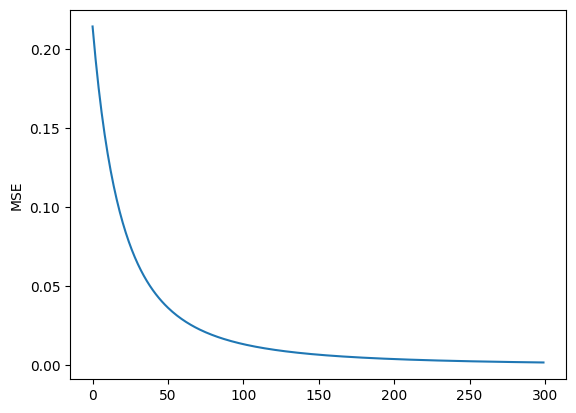

In [ ]:
#@title 6 - monitoring

#### Les données qui ont été stockées pendant l'apprentissage sur la fonction
#### de perte vont être affichées pour être analysées

import matplotlib.pyplot as plt 
plt.plot(Graphique_MSE) 
plt.ylabel('MSE') 
plt.show()

# Recommencer l'apprentissage en modifiant largement l'hyper paramètre epoch
# et monitorer les résultats pour comparer

In [ ]:
#@title 7 - la prédiction

#### Vérification du bon comportement du perceptron

# Affichage des poids obtenus à la fin de l'apprentissage
print ("Poids finaux: " ) 
print ("W11 = "+str(w11)) 
print ("W21 = "+str(w21)) 
print ("Wb = "+str(wb))

# Chargement des données d'entrée pour une observation donnée
x1 = 0
x2 = 1

# Etape 1 : Calcul de la somme pondérée 
...
 
# Etape 2 : Application de la fonction d'activation 
...
 
print("Prédiction du [" + str(x1) + "," + str(x2) + "]") 
print("Prédiction = " + str(valeur_predite))

# Constatez le résultat obtenu et recommencez avec une nouvelle prédiction

Poids finaux: 
W11 = -6.332062515839574
W21 = 0.3624059988696296
Wb = 2.7707630207149703
Prédiction du [0,1]


NameError: ignored

In [ ]:
# Affichage des poids obtenus à la fin de l'apprentissage
print("Poids finaux:")
print("W11 =", w11)
print("W21 =", w21)
print("Wb =", wb)

# Chargement des données d'entrée pour une observation donnée
x1 = 0
x2 = 1

# Etape 1 : Calcul de la somme pondérée
somme = somme_ponderee(x1, w11, x2, w21, biais, wb)

# Etape 2 : Application de la fonction d'activation
valeur_predite = fonction_activation_sigmoide(somme)

print("Prédiction du [" + str(x1) + "," + str(x2) + "]")
print("Prédiction =", valeur_predite)


Poids finaux:
W11 = -6.332062515839574
W21 = 0.3624059988696296
Wb = 2.7707630207149703
Prédiction du [0,1]
Prédiction = 0.9582403879400967
